In [1]:
!pip install transformers accelerate bitsandbytes torch llava-torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from PIL import Image
import requests
from io import BytesIO
import textwrap

import torch
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import SeparatorStyle, conv_templates
from llava.mm_utils import (
    KeywordsStoppingCriteria,
    get_model_name_from_path,
    process_images,
    tokenizer_image_token,
)
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init

[2023-11-13 14:46:19,945] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
disable_torch_init()

In [5]:
model = "4bit/llava-v1.5-13b-3GB"
model_name = get_model_name_from_path(model)
model_name

'llava-v1.5-13b-3GB'

In [6]:
!gdown 1mp5rAo4-apdl0DJO5XXQhjMa2ja7IFEH
!gdown 1Qnutc8S7F6jMN6RkJZBgiAePymDcJ3Ii
!gdown 1XM7QgiuNj7KjapaEfjyfxMVWSdQaqsaH
!gdown 1m9v8EVZ16sYcUlCGUH8PFuLxFxaml90U
!gdown 1x7XtPRG-IbSxyCO-ZTo_P7jirwRFY-JN

Downloading...
From: https://drive.google.com/uc?id=1mp5rAo4-apdl0DJO5XXQhjMa2ja7IFEH
To: /content/btc-price-chart.png
100% 133k/133k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qnutc8S7F6jMN6RkJZBgiAePymDcJ3Ii
To: /content/meme.jpeg
100% 109k/109k [00:00<00:00, 93.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XM7QgiuNj7KjapaEfjyfxMVWSdQaqsaH
To: /content/captcha.jpeg
100% 4.52k/4.52k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m9v8EVZ16sYcUlCGUH8PFuLxFxaml90U
To: /content/bitcoin-paper.jpg
100% 945k/945k [00:00<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x7XtPRG-IbSxyCO-ZTo_P7jirwRFY-JN
To: /content/bike-girl.jpeg
100% 207k/207k [00:00<00:00, 126MB/s]


In [15]:
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path = model,
    model_base = None,
    model_name = model_name,
    load_4bit = True
)

(…)b-3GB/resolve/main/tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

(…)3GB/resolve/main/special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

(…)va-v1.5-13b-3GB/resolve/main/config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

(…)esolve/main/pytorch_model.bin.index.json:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

pytorch_model-00001-of-00009.bin:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

pytorch_model-00002-of-00009.bin:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

pytorch_model-00003-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00004-of-00009.bin:   0%|          | 0.00/2.96G [00:00<?, ?B/s]

pytorch_model-00005-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00006-of-00009.bin:   0%|          | 0.00/2.98G [00:00<?, ?B/s]

pytorch_model-00007-of-00009.bin:   0%|          | 0.00/2.87G [00:00<?, ?B/s]

pytorch_model-00008-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00009-of-00009.bin:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

(…)rge-patch14-336/resolve/main/config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

(…)-3GB/resolve/main/generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

(…)36/resolve/main/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [7]:
def load_image(image_file):
  if image_file.startswith("http://") or image_file.startswith("https://"):
    request = requests.get(image_file)
    image = Image.open(BytesIO(request.content)).convert("RGB")
  else: image = Image.open(image_file).convert("RGB")

  return image

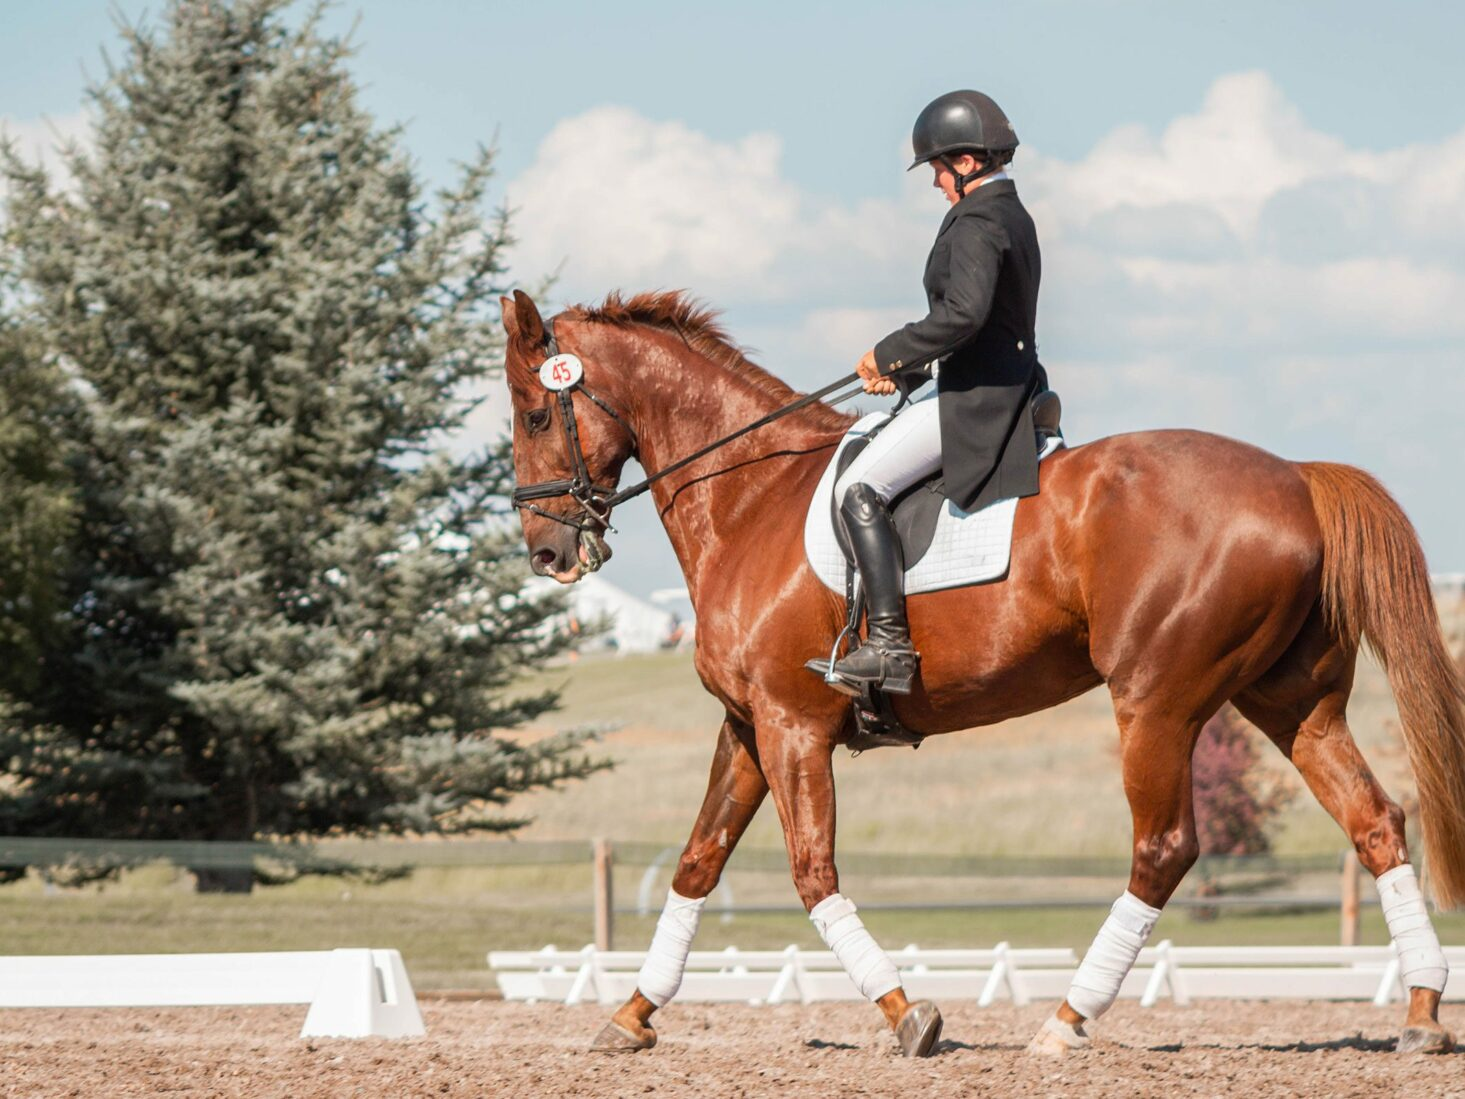

In [8]:
image = load_image("https://luxurylondon.co.uk/wp-content/uploads/2022/08/horse-riding-london-1-1465x1099-c-center.jpg")
image

In [16]:
def process_image(image):
    args = {"image_aspect_ratio": "pad"}
    image_tensor = process_images(
        [image],
        image_processor,
        args
    )

    return image_tensor.to(model.device, dtype=torch.float16)

In [17]:
processed_image = process_image(image)
type(processed_image), processed_image.shape

(torch.Tensor, torch.Size([1, 3, 336, 336]))

In [18]:
CONV_MODE = "llava_v0"

In [19]:
def create_prompt(prompt: str):
    conv = conv_templates[CONV_MODE].copy()
    roles = conv.roles
    prompt = DEFAULT_IMAGE_TOKEN + "\n" + prompt
    conv.append_message(roles[0], prompt)
    conv.append_message(roles[1], None)

    return conv.get_prompt(), conv

In [20]:
prompt, _ = create_prompt("Describe the image")
print(prompt)

A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
Describe the image###Assistant:


In [21]:
def ask_image(image: Image, prompt: str):
    image_tensor = process_image(image)
    prompt, conv = create_prompt(prompt)
    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt").unsqueeze(0).to(model.device)
    )

    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    stopping_criteria = KeywordsStoppingCriteria(
        keywords=[stop_str],
        tokenizer=tokenizer,
        input_ids=input_ids
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=image_tensor,
            do_sample=True,
            temperature=0.01,
            max_new_tokens=512,
            use_cache=True,
            stopping_criteria=[stopping_criteria],
        )
    return tokenizer.decode(
        output_ids[0, input_ids.shape[1] :], skip_special_tokens=True
    ).strip()

In [22]:
%%time
result = ask_image(image, "Describe the image")
print(textwrap.fill(result, width=110))

The image features a person riding a brown horse in a field. The rider is wearing a black jacket and appears
to be enjoying their time on horseback. The horse and rider are the main focus of the scene, with the horse
occupying a significant portion of the image. The field provides a spacious and open environment for the rider
and the horse to move around and engage in their activity.
CPU times: user 13.5 s, sys: 510 ms, total: 14 s
Wall time: 19.1 s


In [23]:
%%time
result = ask_image(
    image,
    "Does the rider is wearing a helemt?"
)
print(textwrap.fill(result, width=110))

Yes, the rider is wearing a helmet while riding the horse.
CPU times: user 3.53 s, sys: 254 ms, total: 3.78 s
Wall time: 3.88 s


#### NOTICE THE FOLLOWING 2 PROMPTS WHERE THE MODEL FAILS

In [24]:
%%time
result = ask_image(
    image,
    "What is the number on the horse head?"
)
print(textwrap.fill(result, width=110))

The number on the horse head is 13.
CPU times: user 2.38 s, sys: 456 ms, total: 2.83 s
Wall time: 2.87 s


In [26]:
%%time
result = ask_image(
    image,
    "Have a look on the horse head under its ears, it seems there is a number under the ears what is it?"
)
print(textwrap.fill(result, width=110))

The number under the horse's ears is 10.
CPU times: user 2.36 s, sys: 364 ms, total: 2.72 s
Wall time: 2.72 s


# OCR

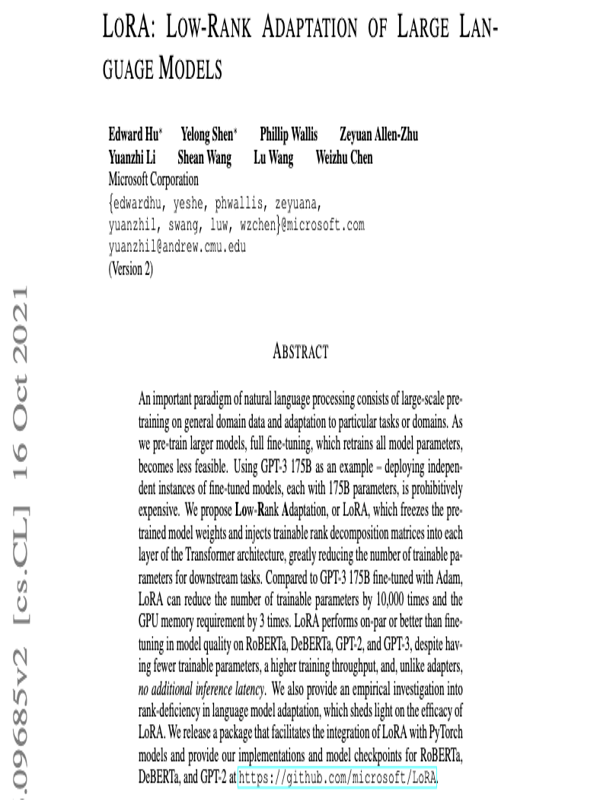

In [27]:
image = load_image("https://miro.medium.com/v2/resize:fit:788/1*e5sUai2vY4mdBuKCh2qkwQ.png")
image.resize((600,800))

In [28]:
%%time
result = ask_image(image, "What is the title of the paper?")
print(textwrap.fill(result, width=110))

Lora: Low-Rank Adaptation of Large Language-Language Models
CPU times: user 2.78 s, sys: 367 ms, total: 3.14 s
Wall time: 3.15 s


#### THE MODEL ALSO FAILS IN EXTRACTING NUMBERS

In [29]:
%%time
result = ask_image(
    image,
    "What is the release date of the paper?"
)
print(textwrap.fill(result, width=110))

The paper was released on April 1, 2016.
CPU times: user 3.28 s, sys: 350 ms, total: 3.63 s
Wall time: 3.71 s


# CHARTS

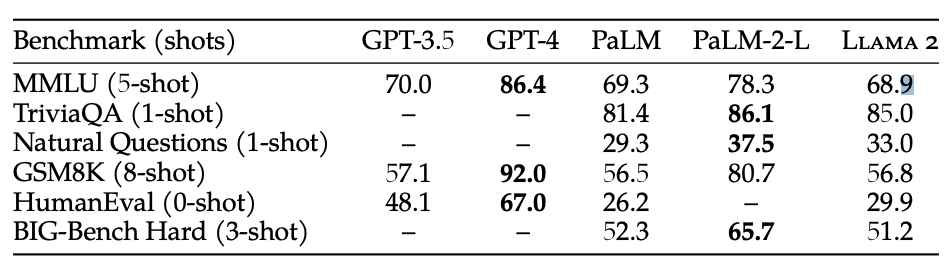

In [30]:
image = load_image("https://lh3.googleusercontent.com/URNwFWsk9JXokjlg84K6QYbiTDSxC8a6QAt-puXJaW6tavAbHiHoGpVpurrtAThJSAppFoj-SvwxS1bgNjp1_UwMQ4Wywyil15z3q0Hwv6MAgRxAXGDymns86jR70nxqabsqkAuXhSb4Q3AxtR2gM40")
image

In [32]:
%%time
result = ask_image(
    image,
    "Describe the table"
)
print(textwrap.fill(result, width=110))

The table is a list of various measurements, including GPT-3.5, GPT-4, and GT-4. The measurements are
displayed in a row, with each measurement having a corresponding value. The table is organized in a way that
allows for easy comparison and understanding of the different measurements.
CPU times: user 8.57 s, sys: 320 ms, total: 8.89 s
Wall time: 9.03 s


# Alternative way for installing whether on linux or colab

In [1]:
%cd /content
!git clone -b 5GB https://github.com/camenduru/LLaVA
%cd /content/LLaVA

!pip install ninja
!pip install flash-attn --no-build-isolation

!pip install -e .

/content
Cloning into 'LLaVA'...
remote: Enumerating objects: 1529, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 1529 (delta 345), reused 323 (delta 323), pack-reused 1149
Receiving objects: 100% (1529/1529), 13.21 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (919/919), done.
/content/LLaVA
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.3.3-cp310-cp310-linux_x86_64.whl size=30036691 sha256=0217a66b286e84e29e041a6161e84329253126eeb338bcfc3ff245dff3fa7ab5
  Stored in directory: /root/.cache/pip/wheels/e5/e6/fa/941802ec61d1afd320d27160ab1db98e6dba65381f84b76d4a
Successfully built flash-attn
Obtaining file:///content/LLaVA
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backen

In [2]:
import threading
import subprocess
threading.Thread(target=lambda: subprocess.run(['python3', '-m', 'llava.serve.controller', '--host', '0.0.0.0', '--port', '10000'], check=True), daemon=True).start()

In [3]:
import threading
import subprocess
command = [
    'python3', '-m', 'llava.serve.model_worker',
    '--host', '0.0.0.0',
    '--controller', 'http://localhost:10000',
    '--port', '40000',
    '--worker', 'http://localhost:40000',
    '--model-path', '4bit/llava-v1.5-7b-5GB',
    '--load-8bit'
]
threading.Thread(target=lambda: subprocess.run(command, check=True, shell=False), daemon=True).start()

In [ ]:
!python3 -m llava.serve.gradio_web_server --controller http://localhost:10000 --model-list-mode reload --share

[2023-11-13 15:24:52,838] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-11-13 15:24:54.127543: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 15:24:54.127597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 15:24:54.127643: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 15:24:55.445125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-13 15:24:58 | INFO | gradio_web_server | args: Namespace(host='0.0.0.0', port=None, controller_url='http://loc